In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math

In [53]:
# Read the CSV data into a DataFrame
data = pd.read_csv('Titanic Dataset.csv')

In [54]:
# Univariate Analysis 1: Count and percentage of Survived
survived_counts = data['Survived'].value_counts()
survived_percentages = data['Survived'].value_counts(normalize=True) * 100

In [55]:
# Calculate the count and percentage of Pclass
pclass_counts = data['Pclass'].value_counts()
pclass_percentages = data['Pclass'].value_counts(normalize=True) * 100

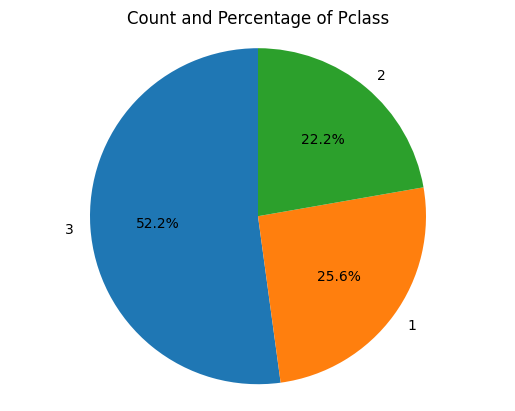

In [56]:
# Plotting the pie chart
fig, ax = plt.subplots()
ax.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
# Set the title
plt.title('Count and Percentage of Pclass')
# Display the pie chart
plt.show()

In [57]:
# Univariate Analysis : Summary statistics of Age
age_summary = data['Age'].describe()

In [58]:
# Count and percentage of Sex
sex_counts = data['Sex'].value_counts()
sex_percentages = data['Sex'].value_counts(normalize=True) * 100

In [59]:
# Plotting the results
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Survived')

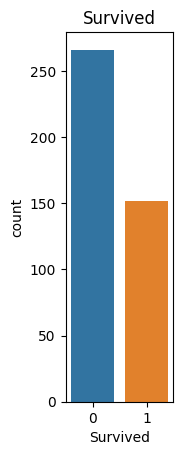

In [60]:
plt.subplot(1, 4, 1)
sns.countplot(data=data, x='Survived')
plt.title('Survived')

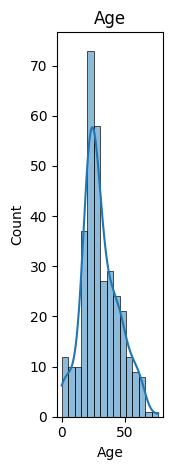

In [61]:
plt.subplot(1, 4, 3)
sns.histplot(data=data, x='Age', kde=True)
plt.title('Age')
plt.tight_layout()
plt.show()

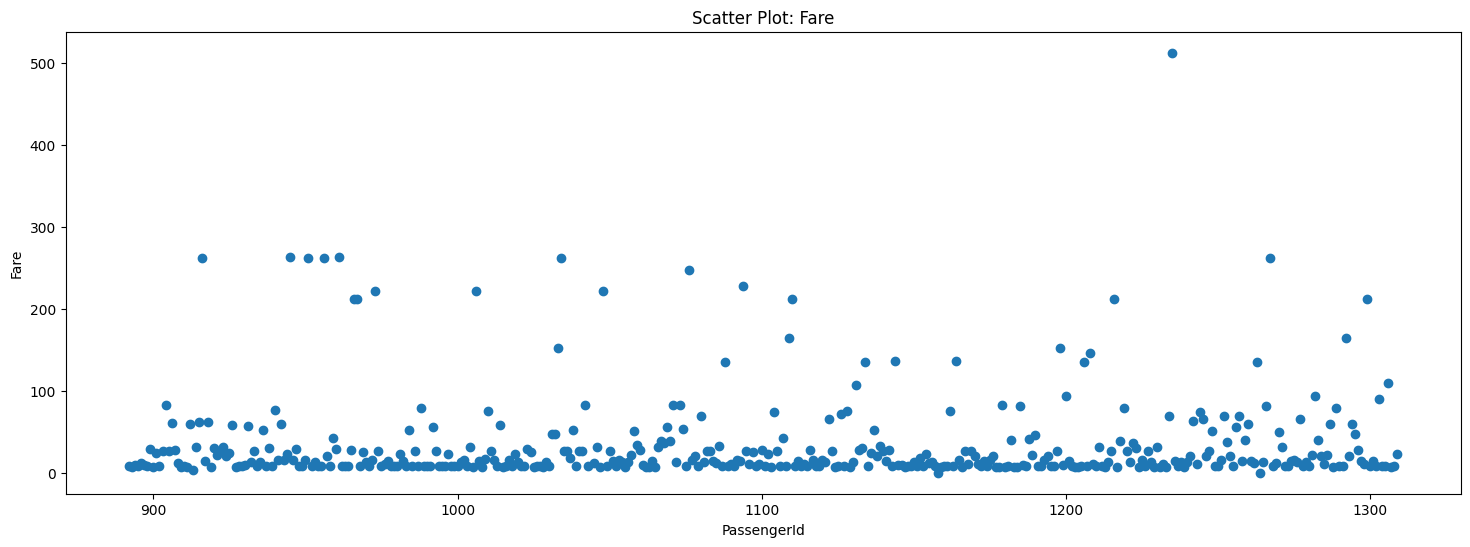

In [62]:
# Univariate Analysis: Scatter plot of Fare
plt.figure(figsize=(18, 6))
plt.scatter(data['PassengerId'], data['Fare'])
plt.xlabel('PassengerId')
plt.ylabel('Fare')
plt.title('Scatter Plot: Fare')
plt.show()

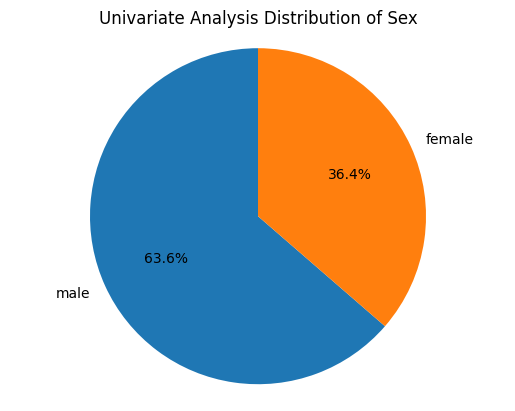

In [63]:
# Plot the pie chart
fig, ax = plt.subplots()
ax.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
# Set the aspect ratio to be equal to ensure a circular pie chart
ax.axis('equal')
# Set the title
plt.title('Univariate Analysis Distribution of Sex')
# Display the pie chart
plt.show()

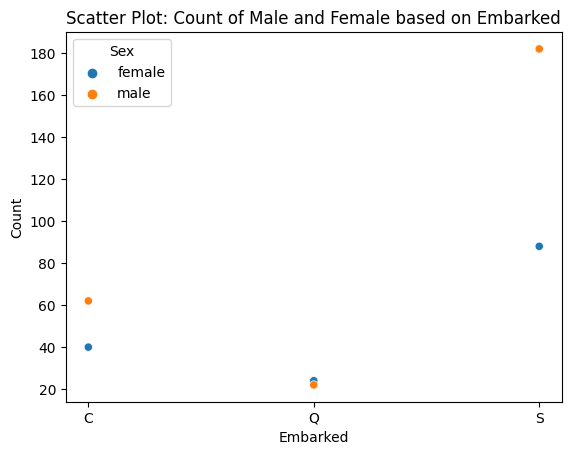

In [64]:
# Group the data by 'Embarked' and 'Sex', and calculate the count
grouped_data = data.groupby(['Embarked', 'Sex']).size().reset_index(name='Count')
# Create the scatter plot
sns.scatterplot(x='Embarked', y='Count', hue='Sex', data=grouped_data)
# Set the plot title and labels
plt.title('Scatter Plot: Count of Male and Female based on Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
# Show the plot
plt.show()

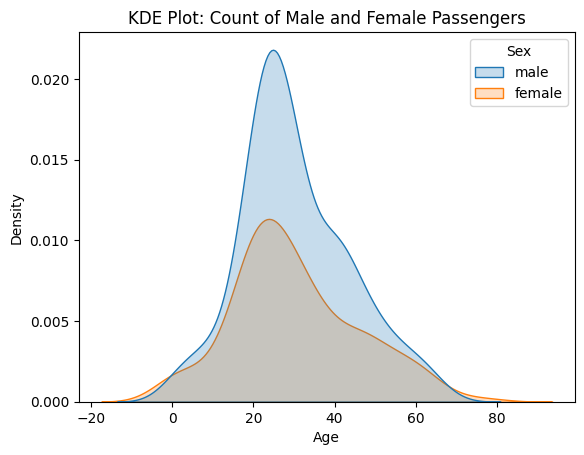

In [65]:
# Bivariate analysis - Sex vs. Count
sns.kdeplot(data=data, x='Age', hue='Sex', fill=True)
# Set the plot title and labels
plt.title('KDE Plot: Count of Male and Female Passengers')
plt.xlabel('Age')
plt.ylabel('Density')
# Show the plot
plt.show()

In [66]:
# Calculate the maximum age value
max_age = data['Age'].max()
# Define the number of age intervals
num_intervals = 8
# Calculate the interval size
interval_size = math.ceil(max_age / num_intervals)
# Generate the age intervals
age_intervals = [i * interval_size for i in range(num_intervals)]
# Append the maximum age to the intervals
age_intervals.append(max_age)
# Categorize the age data into intervals
data['Age Group'] = pd.cut(data['Age'], age_intervals)

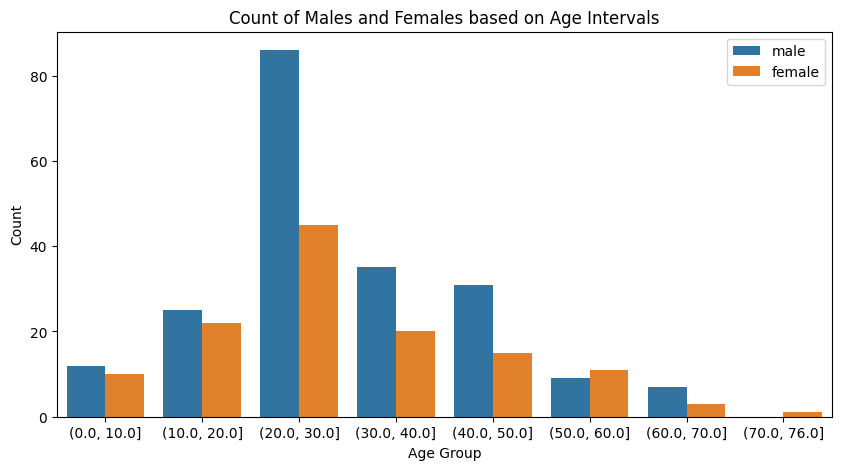

In [67]:
# Create a cross-tabulation of Age Group and Sex
cross_tab = pd.crosstab(data['Age Group'], data['Sex'])
plt.figure(figsize=(10,5))
# Plot the count plot
sns.countplot(data=data, x='Age Group', hue='Sex')
# Set the labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Males and Females based on Age Intervals')
# Show the legend
plt.legend()
# Display the graph
plt.show()

In [72]:
# Create a scatter plot using Plotly Express
fig = px.scatter(data, x='Age', y='Sex', color='Survived')
# Set the axis labels and title
fig.update_layout(xaxis_title='Age', yaxis_title='Sex', title='Multivariate Analysis: Sex vs Age vs Survived')
# Show the plot
fig.show()

In [73]:
# Create a treemap figure
fig = px.treemap(data, path=['Embarked', 'Sex', 'Pclass'], values='PassengerId')
# Update the layout
fig.update_layout(title='Treemap: Embarked, Sex, and Pclass',
                  uniformtext=dict(minsize=10, mode='hide'))
# Display the treemap
fig.show()

In [70]:
# Create the bubble chart
fig = px.scatter(data, x='Age', y='Fare', color='Sex', size='Pclass', hover_data=['Embarked', 'Survived'],
                 title='Multivariate Analysis - Bubble Chart')
# Set the axis labels
fig.update_xaxes(title='Age')
fig.update_yaxes(title='Fare')
# Show the plot
fig.show()

In [71]:
# Create the 3D scatter plot
fig = px.scatter_3d(data, x='Age', y='Sex', z='Survived', color='Survived',
                    title='Multivariate Analysis - 3D Scatter Plot')
# Set the axis labels
fig.update_layout(scene=dict(xaxis_title='Age', yaxis_title='Sex', zaxis_title='Survived'))
# Show the plot
fig.show()